In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata

In [ ]:
def gillespieSEIHR(initial, beta, mu1,mu2, sigma, omega,epsilon,alpha, mort, gam,  max_time):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    cuminf = []
    cuminf.append(0)
    events = []
    while times <max_time and (pop[ind][1]+pop[ind][2]+pop[ind][3]>0):
        state = np.zeros(shape= (5,12))
        
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################
        
        
        R_se = beta*(pop[ind][0])*(pop[ind][2] + alpha*pop[ind][3])/N + epsilon*pop[ind][0] 
        state[:,0] = [-1, 1, 0, 0,0]
        
        R_ei = sigma*pop[ind][1]
        state[:,1] = [0, -1, 1, 0,0]
        
        R_ih = omega*pop[ind][2]
        state[:,2] = [0, 0, -1, 1, 0]
        
        R_ir = mort*mu1*pop[ind][2]
        state[:,3] = [0,0,-1,0,1]
        
        R_hr = mort*mu2*pop[ind][3]
        state[:,4] = [0,0,0,-1,1]

        R_is = (1-mort)*mu1*pop[ind][2]
        state[:,5] = [1,0,-1,0,0]

        R_hs = (1-mort)*mu2*pop[ind][3]
        state[:,6] = [1,0,0,-1,0]

        rate = [R_se, R_ei, R_ih, R_ir, R_hr, R_is, R_hs]

        Rtotal = sum(rate)
        delta_t= -np.log(np.random.uniform(0,1))/Rtotal

        P = np.random.uniform(0,1)*Rtotal
        times =times+ delta_t
        event = np.min(np.where(P<=np.cumsum(rate)))
        events.append(event)
        event_time.append(times)
        pop.append(pop[ind]+state[:,event])
        
        if event == 1:
            cuminf.append(1 )
        else:
            cuminf.append(0)
        ind=ind+1
        N = sum(pop[ind][:5])

    return event_time, np.array(pop), events

In [293]:
def epsilong(bb, tt, tau, e):
    eps = np.zeros(len(tt))
    y = np.where(np.sin(bb*(tt))>=0)
    y = np.array(y)[0]
    eps[y] = ([(e/bb)*(np.cos(bb*(tt[i]+tau))-np.cos(bb*tau)) for i in y])
    return eps

In [301]:
def CDF(max_time, dt, tau, beta, mu1,mu2, sigma, omega,epsilon,alpha, mort, Input, B ):
    N = sum(Input)
    tt = np.arange(0,max_time, dt)    
    
    mt = (sigma*Input[1] + (omega+mort*mu1)*Input[2] +
         (mort*mu2 + (1-mort)*mu2)*Input[3] + 
         (beta/N)*Input[0]*(Input[2]+alpha*Input[3]))*tt - (epsilon/B)*epsilong(B,tt,tau, epsilon)*Input[0]
    
#     mt = (1/2)*tt
    F = 1 - np.exp(-mt)
    print(epsilong(B,tt,tau, epsilon))
    return tt, F, mt
    

In [303]:
cdf_rate = CDF(1000, 0.01,0, 1, 1/7, 1/5, 1/5, 1/12, 0.001, 1, 0.7, [1500,1,0,0], 2*np.pi/365)

[ 0.00000000e+00 -8.60710316e-10 -3.44284123e-09 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [304]:
tt = np.arange(0,10, 0.001)
# [(1/(2*np.pi/365))*(np.maximum(np.cos((2*np.pi/365)*(tt +1)),0) -np.maximum(np.cos((2*np.pi/365)*1),0))*1000 if ]

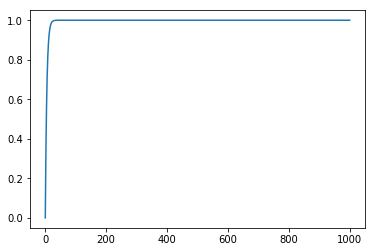

In [305]:
plt.plot(cdf_rate[0], cdf_rate[1])

In [306]:
def inverseCDF(t, F):
    r = np.random.uniform(0,1)
    s2 = np.min(np.where(F>r))
    s1 = s2-1
    
    y2,y1 = F[s2], F[s1]
    x2, x1 = t[s2], t[s1]
    
    m = (y2-y1)/(x2-x1)
    tt = (r-y1)/m + x1
    return tt

In [307]:
time_steps = []
for l in range(10000):
    time_steps.append(inverseCDF(cdf_rate[0], cdf_rate[1]))

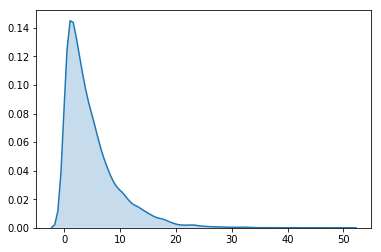

In [308]:
sns.kdeplot(time_steps, shade = True)
# plt.hist(time_steps)

In [ ]:
def changingGillespie(initial, beta, mu1,mu2, sigma, omega,epsilon,alpha, mort, B,  max_time):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    cuminf = []
    cuminf.append(0)
    events = []
    while times <max_time and (pop[ind][1]+pop[ind][2]+pop[ind][3]>0):
        state = np.zeros(shape= (5,12))
        
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################
        
        
        R_se = beta*(pop[ind][0])*(pop[ind][2] + alpha*pop[ind][3])/N + epsilon*pop[ind][0]*
        state[:,0] = [-1, 1, 0, 0,0]
        
        R_ei = sigma*pop[ind][1]
        state[:,1] = [0, -1, 1, 0,0]
        
        R_ih = omega*pop[ind][2]
        state[:,2] = [0, 0, -1, 1, 0]
        
        R_ir = mort*mu1*pop[ind][2]
        state[:,3] = [0,0,-1,0,1]
        
        R_hr = mort*mu2*pop[ind][3]
        state[:,4] = [0,0,0,-1,1]

        R_is = (1-mort)*mu1*pop[ind][2]
        state[:,5] = [1,0,-1,0,0]

        R_hs = (1-mort)*mu2*pop[ind][3]
        state[:,6] = [1,0,0,-1,0]

        rate = [R_se, R_ei, R_ih, R_ir, R_hr, R_is, R_hs]

        Rtotal = sum(rate)
        delta_t= -np.log(np.random.uniform(0,1))/Rtotal

        P = np.random.uniform(0,1)*Rtotal
        times =times+ delta_t
        event = np.min(np.where(P<=np.cumsum(rate)))
        events.append(event)
        event_time.append(times)
        pop.append(pop[ind]+state[:,event])
        
        if event == 1:
            cuminf.append(1 )
        else:
            cuminf.append(0)
        ind=ind+1
        N = sum(pop[ind][:5])

    return event_time, np.array(pop), events